# Описание проекта
Нам предстоит сделать предварительный анализ тарифов федерального оператора сотовой связи на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Цель - скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Данные по тарифным планам даны в соответсвующей базе.
Выборка - информация о 500 пользователей оператора: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

#### Тарифы
*Тариф «Смарт»*
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
      - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
      - сообщение: 3 рубля
      - 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

#### Данные предоставленных для анализа
*Таблица **users** - информация о пользователях:*
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана


*Таблица **calls** - информация о звонках:*
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок


*Таблица **messages** - информация о сообщениях:*
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение


*Таблица **internet** - информация об интернет-сессиях:*
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя


*Таблица **tariffs** - информация о тарифах:*
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Содержание проекта

### Проверка баз данных предоставленных для работы
- #### [Информация о клиентах](#users).
   - [Итог осмотра базы о клиентах](#users_clear).
- #### [Информация о звонках](#calls)
   - [Итог осмотра базы о звонках](#calls_clear).
- #### [Информация о сообщениях](#msg)
   - [Итог осмотра базы о звонках](#msg_clear).
- #### [Информация о доступе в интернет](#inet)
   - [Итог осмотра базы о доступе в интернет](#inet_clear).   
- #### [Информация о тарифах](#tariff)
   - [Итог осмотра базы о тарифах](#tariff_clear).
   
### [Подготовка данных для расчетов](#count)   
- #### [Расчет количества сделанных звонков и израсходованных минут разговора](#calls_count)
- #### [Расчет количества отправленных сообщений](#msg_count)
- #### [Расчет израсходованного интернет-трафика](#inet_count)
- #### [Расчет помесячной выручки с каждого пользователя](#rev_count)
   - [Поготовка таблицы для расчета выручки](#pre_rev_count)
   - [Расчет выручки](#final_rev_count)
- #### [Итоги проведенных расчетов](#info_count)   

### [Анализ поведения пользователей в зависимости от тарифа](@by_tariff)
- #### [Расчет количество потребляемых услуг по месяцам](#count_by_month)
- #### [Расчет среднего, дисперсии и стандартного отклонения по месяцам](#mean_by_month)
- #### [Построение диаграмм](#hist)
    - [Гистограммы по позиции "количество минут звонков"](#hist_calls)
    - [Гистограммы по позиции "количество потраченных мегабайт"](#hist_mb)
    - [Гистограммы по позиции "количество отправленых сообщений"](#hist_msg)
    - [Гистограммы по позиции "выручка"](#hist_rev)
- #### [Итоги анализа поведения пользователей в зависимости от тарифа](#final_by_tariff)
   
### [Проверка гипотез](#hyp).
- #### [Гипотеза 1: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"](#hyp_1)
- #### [Гипотеза 2: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"](#hyp_2)

### [Заключение](#final)

In [1]:
# загружаем нужные библиотеки для обработки данных

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime as dt
from scipy import stats as st

Проверяем данные в предоставленных файлах. Посмотрим на размер данных, названия признаков и их типы. Обозначим дата фреймы по названиям файлов. Найдем и опишем проблемные места в данных - выбросы, отсутствующие данные, нулевые значения и т.д.

#### База - информация о клиентах <a name="users"></a>

In [2]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.head()  # проверка

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- Всего 500 записей - клиентов. Пропущенные значение в столбце дата прекращения пользования тарифом - хорошая новость подавляющее большинство еще пользуются связью нашего оператора. 
- Только 38 клиентов прекратили сотрудничество - можно рассмотреть подробнее.
- Данные по дате нужно перевести в подходящий формат.
- Нам понадобится отчет по месяцам - нужно создать соответствующий столбец
- Данные по городам нужно рассмотреть по необходимости нормализировать - перевести в строчный формат, потом обратно в читаемый, во избежании пропуска дубликтов
- ФИО клиента нужно сложить в один столбец, также провести нормализацию.

Посмотрим все прерванные контракты

In [4]:
churn_date_null = df_users[~df_users.churn_date.isnull()]
churn_date_null

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


На первый взгляд никаких закономерностей нет.

In [5]:
# переведем столбцы дат в тип данных - datetime
df_users.churn_date = pd.to_datetime(df_users.churn_date)
df_users.reg_date = pd.to_datetime(df_users.reg_date)

In [6]:
# создадим столбец с датой приведенной к значению месяца
df_users['month'] = df_users['reg_date'].dt.month
df_users.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month       500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


In [7]:
df_users.sample()  # проверка

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
436,1436,75,NaT,Москва,Радим,Ерофеев,2018-04-04,ultra,4


Нормализируем данные по городам - на всякий случай, не перебирая все города глазами.

In [8]:
df_users.city = df_users.city.str.lower()  # все строчные
df_users.city = df_users.city.str.title()  # все с заглавной буквы
# по Ростову все-таки будет ошибка.
df_users.city = df_users.city.replace('Ростов-На-Дону', 'Ростов-на-Дону')
df_users.city.unique()  # проверка городов через дефис.

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Имена и фамилии и также нормализуем 

In [9]:
df_users.first_name = df_users.first_name.str.lower()  # все строчные
df_users.last_name = df_users.last_name.str.lower()  # все строчные
df_users.first_name = df_users.first_name.str.title()  # все с заглавной буквы
df_users.last_name = df_users.last_name.str.title()  # все с заглавной буквы
df_users.sample()  # проверка 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
130,1130,58,NaT,Тюмень,Инара,Крюкова,2018-04-01,smart,4


In [10]:
df_users.age.describe()  # состав клиентов по возрасту

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Проверим на дубликаты

In [11]:
df_users.duplicated().sum()

0

Нет дубликатов

###### Общая информация по результатам предварительного осмотра и "чистки" базы клиентов: <a name="users_clear"></a>
- 500 записей клиентов. 
- Только 38 не пропущенных значение в столбце дата прекращения пользования тарифом. Удалять пропущенные значения нет смысла так как другие данные по этим клиентам как раз нам понадобяться.
- Данные по датам перевели в соответствующий формат.
- Создали столбец по месяцам даты закрытия контракта (хотя по сути зря - эта информация нам не пригодится)
- Данные по городам и ФИО клиента нормализовали - провели двойную трасформацию: сначала все строчные буквы затем обратно "первая заглавная" (косметические улучшения). Таким образом мы избежали потери возможных дубликатов из-за некорректного ввода данных.
- ФИО клиента занесли в один столбец в формате "Имя Фамилия" (косметические улучшения).
- Возрастной состав базы "хороший" - охват аудитории равномерный "от мала до велика", средняя и медиана равны - распределение равномерное.

#### База - информация о звонках <a name="calls"></a>

In [12]:
df_calls = pd.read_csv("/datasets/calls.csv")
df_calls.head()  # проверка

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Нулевое время продолжительности звонка нужно рассмотреть подробнее. Видимо это недозвон(сброс) в результате сбоя сети или случайных действий пользователя. Если таких звонков много - есть проблемы внутри сети. Либо это технический сбой регистрации звонка.

In [13]:
df_calls.info()  # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


- Пропущенных данных нет. 
- Даты звонков нужно перевести во временный тип данных
- Нужно создать столбец с датой звонков по месяцам.

In [14]:
# переведем столбец дата звонка в тип данных - datetime
df_calls.call_date = pd.to_datetime(df_calls.call_date)

# создадим столбец с датой приведенной к значению месяца
df_calls['month'] = df_calls['call_date'].dt.month

In [15]:
df_calls.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [16]:
df_calls.describe()

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,8.574067
std,5.843365,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,1.300000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


Судя по значениям среднего и медианы для продолжительности звонков - данные должны быть распределены более или менее равномерно, с явными выбросами справа (немногочисленными скорее всего). Проверим нулевые значения продолжительности разговора.

In [17]:
df_calls.duration.value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [18]:
"Сброшенных звонков: {:.2%} от всего количества в базе".format(
    39613/202607)  # проверим какая часть звонков "сбрасывается"

'Сброшенных звонков: 19.55% от всего количества в базе'

Получается примерно 20% звонков не проходят - приходится перезванивать?. Кому так не везет?

In [19]:
call_null = df_calls.query('duration == 0')
# сколько клиентов и сколько раз пришлось перезванивать
call_null.user_id.value_counts()

1377    336
1168    308
1453    295
1375    290
1196    262
       ... 
1016      6
1084      5
1406      5
1424      5
1442      5
Name: user_id, Length: 492, dtype: int64

In [20]:
df_calls.user_id.value_counts()  # сколько вообще клиентов по базе звонков

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Такие срывы звонков у всех клиентов (492 человека) в той или иной степени. В этой базе звонков на 8 человек меньше чем в базе клиентов.
Проверим нет ли аномалии по нулевым звонкам в каком либо месяце

In [21]:
df_calls_null = df_calls.query('duration == 0')
df_calls_null.sort_values(by='month')

,id,call_date,duration,user_id,month
82430,1204_313,2018-01-13,0.0,1204,1
90959,1227_379,2018-01-10,0.0,1227,1
2258,1005_855,2018-01-27,0.0,1005,1
90951,1227_371,2018-01-19,0.0,1227,1
90893,1227_313,2018-01-23,0.0,1227,1
...,...,...,...,...,...
112594,1289_452,2018-12-04,0.0,1289,12
112618,1289_476,2018-12-30,0.0,1289,12
112634,1289_492,2018-12-01,0.0,1289,12
112402,1289_260,2018-12-31,0.0,1289,12


In [22]:
df_calls_null.month.unique()

array([ 7,  8, 11, 10,  5,  6, 12,  9,  4,  3,  1,  2], dtype=int64)

Нулевые звонки не зависят от месяца

##### Исходя из информации что такие звонки - ошибка регистрации системы, заменим нулевые значение продолжительности звонков на минимальное пороговое значение времени звонка которое учитывается системой = 1 минута.   

In [23]:
df_calls['duration'] = df_calls['duration'].replace(0.0, 1)
df_calls  # проверка

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.00,1000,7
1,1000_1,2018-08-17,1.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [24]:
df_calls.duration.min()   # проверим какое минимальное значение фиксирует система

0.01

Система регистрирует звонки с 0,01 минуты. Значит 0,0 во времени звонка - системная ошибка. Но так как все значения времении на звонок мы округлим до ближайшего целого (вверх). Логика замены 0,0 на 1 верная.

Проверим на дубликаты

In [25]:
df_calls.duplicated().sum()

0

Нет дубликатов

Округлим значения "времени разговора" до целых значений в соответсвии с правилами тарифа

In [26]:
df_calls.duration = df_calls.duration.apply(np.ceil).astype('int') # округляем вверх до целого значения
df_calls.sample(3)

,id,call_date,duration,user_id,month
103444,1265_106,2018-07-04,15,1265,7
201637,1496_459,2018-12-26,2,1496,12
66563,1169_22,2018-10-12,6,1169,10


###### Общая информация по результатам предварительного осмотра и "чистки" базы звонков: <a name="calls_clear"></a>
- Пропущенных данных нет. 
- Данные по датам звонков перевели в соответствующий формат.
- Создали столбец по месяцам дат звонков
- В базе почти 20% звонков имеют значение 0.0 - скорее всего это ошибки регистрации времени разговора продолжительности меньше 1 минуты, поскольку других возможных объяснений такой ситуации не нашли - все нулевые записи продолжительности звонков заменили на минимальное пороговое значение ***1 минута***.
- Дубликатов не обнаружено.
- Значения "времени звонка" округлили вверх до ближайшего целого. И привели к целочисленному типу - так данные меньше места занимают.

#### База - информация о сообщениях <a name="msg"></a>

In [27]:
df_messages = pd.read_csv("/datasets/messages.csv")
df_messages.head()  # проверка

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [28]:
df_messages.info()  # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


- Пропущенных значений нет. 
- Даты надо преобразовать в соответсвующий тип данных
- Нужно создать столбец с датой отправки сообщения по месяцам 

In [29]:
# переведем столбец дата сообщения в тип данных - datetime
df_messages.message_date = pd.to_datetime(df_messages.message_date)

# создадим столбец с датой приведенной к значению месяца
df_messages['month'] = df_messages['message_date'].dt.month

df_messages.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


Проверим на дубликаты

In [30]:
df_messages.duplicated().sum()

0

Нет дубликатов

###### Общая информация по результатам предварительного осмотра и "чистки" базы звонков: <a name="msg_clear"></a>
- Пропущенных данных нет. 
- Данные по датам сообщений перевели в соответствующий формат.
- Создали столбец по месяцам дат сообщений
- Дубликатов не обнаружено.

##### База - информация о доступе в интернет. <a name="inet"></a>

In [31]:
df_internet = pd.read_csv("/datasets/internet.csv", index_col=0)  # дополнительный параметр чтобы не появлялась 'Unnamed: 0'
df_internet.head() # проверка

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [32]:
df_internet.tail() # проверка

,id,mb_used,session_date,user_id
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


In [33]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


- Пропущенных значений нет. 
- Даты надо преобразовать в соответсвующий тип данных
- Нужно создать столбец с датой интернет сессий по месяцам 
- Проверить нет ли нулевых значений использованных мегабайт.

Даты сессий в интернете нужно перевести во временной тип данных.

In [34]:
# переведем столбец дата сессии в тип данных - datetime
df_internet.session_date = pd.to_datetime(df_internet.session_date)

# создадим столбец с датой приведенной к значению месяца
df_internet['month'] = df_internet['session_date'].dt.month

Проверим на дубликаты

In [35]:
df_internet.duplicated().sum()

0

Нет дубликатов

In [36]:
df_internet.describe()

,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000
mean,370.192426,1252.099842,8.563315
std,278.300951,144.050823,2.788717
min,0.000000,1000.000000,1.000000
25%,138.187500,1130.000000,7.000000
50%,348.015000,1251.000000,9.000000
75%,559.552500,1380.000000,11.000000
max,1724.830000,1499.000000,12.000000


Проверим сколько данных нулевых гигабайт в базе

In [37]:
df_internet.mb_used.value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

В базе более 10% нулевых значений использованных мегабайт. По аналогии с базой звонков можем предположить что такая же ситуация с мегабайтами - меньше какого-то значения система не учитывает трафик. Если запись есть в таблице то соединение произошло. Для расчетов все данные по трафику округлим до ближайшего целого в большую сторону. Так как других возможностей узнать подробности такой ситуации у нас нет принимает вариант замены нулевых значений на мин. "оплачиваемое" значение 1 мегабайт - интернет сессия состоялась. 

In [38]:
df_internet.mb_used = df_internet.mb_used.replace(0.0, 1)
df_internet.mb_used.min()  # проверим мин. значение фисируемое системой

0.03

In [39]:
df_internet.mb_used.sort_values()

15944        0.03
85722        0.04
108198       0.06
11399        0.07
11027        0.07
           ...   
140299    1623.92
103480    1651.25
7063      1651.55
119156    1702.75
137493    1724.83
Name: mb_used, Length: 149396, dtype: float64

Округлим значения потраченных мегабайт до целого с округлением вверх

In [40]:
df_internet.mb_used = df_internet.mb_used.apply(np.ceil).astype('int')  # округляем до ближайшего целого вверх
df_internet.mb_used.sort_values()

40199        1
19437        1
19436        1
53342        1
53343        1
          ... 
140299    1624
7063      1652
103480    1652
119156    1703
137493    1725
Name: mb_used, Length: 149396, dtype: int32

###### Общая информация по результатам предварительного осмотра и "чистки" базы доступа в интернет: <a name="inet_clear"></a>
- Пропущенных данных нет. 
- Данные по датам перевели в соответствующий формат.
- Создали столбец по месяцам
- Дубликатов не обнаружено.
- Столбец 'Unnamed: 0' - столбец индекс, так был сохранен исходник. Решается дополнительным параметром при чтении файла.
- Округлили значения потраченных мегабайт до ближайшего целого вверх и привели к целочисленному типу.

#### База - информация о тарифах <a name="tariff"></a>

In [41]:
df_tariffs = pd.read_csv("/datasets/tariffs.csv")
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [42]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Вспомогательная таблица со сведениями о тарифах.

###### Общая информация по результатам предварительного осмотра базы доступа о тарифах: <a name="tariff"></a>
- Пропущенных данных нет. 
- База информационная - о предоставялемых услугах и стоимости тарифов  

    **1. Тариф «Смарт»**
        - Ежемесячная плата: 550 рублей
        - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
        - Стоимость услуг сверх тарифного пакета:
                •	минута разговора: 3 рубля (округление до 1 минуты.)
                •	сообщение: 3 рубля
                •	1 Гб интернет-трафика: 200 рублей 
    **2. Тариф «Ультра»**
        - Ежемесячная плата: 1950 рублей
        - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
        - Стоимость услуг сверх тарифного пакета:
                •	минута разговора: 1 рубль (округление до 1 минуты.)
                •	сообщение: 1 рубль
                •	1 Гб интернет-трафика: 150 рублей


### Подготовка данных для расчетов: <a name="count"></a>
Посчитаем для каждого пользователя по месяцам:   
        **1. Количество сделанных звонков**   
        **2. Количество израсходованных минут разговора**   
        **3. Количество отправленных сообщений**   
        **4. Объем израсходованного интернет-трафика**   
        **5. Выручку с каждого пользователя**

#### Посчитаем для каждого пользователя по месяцам количество звонков и израсходованных минут сообщений <a name="calls_count"></a>

In [43]:
df_calls.head()  # вспомним датафрейм

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Cоздадим сводную таблицу с подсчетом количества звонков и кол-ва израсходованных минут по месяцам для каждого клиента

In [44]:
users_calls_count_sum = df_calls.pivot_table(
    index=['user_id', 'month'], values='duration', aggfunc={'count', 'sum'})

# cоздадим читаемые названия столбцов
users_calls_count_sum.columns = ['duration_count', 'duration_sum']
users_calls_count_sum.head(10)  # проверка

duration_count  duration_sum
user_id month                              
1000    5                  22           164
        6                  43           187
        7                  47           346
        8                  52           418
        9                  58           478
        10                 57           363
        11                 43           344
        12                 46           341
1001    11                 59           444
        12                 63           430

In [45]:
users_calls_count_sum.info()  # проверим информацию о данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   duration_count  3174 non-null   int64
 1   duration_sum    3174 non-null   int64
dtypes: int64(2)
memory usage: 63.0 KB


#### Посчитаем для каждого пользователя по месяцам количество отправленных сообщений <a name="msg_count"></a>

In [46]:
df_messages.head()  # вспомним датафрейм

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создадим сводную таблицу с подсчетом количества сообщений по месяцам для каждого клиента.

In [47]:
users_msg_count = df_messages.pivot_table(
    index=['user_id', 'month'], values='id', aggfunc='count')

# cоздадим читаемые названия столбцов
users_msg_count.columns = ['message_count']
users_msg_count.head(10)  # проверка

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

In [48]:
users_msg_count.info()  # проверим информацию о данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   message_count  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


#### Посчитаем для каждого пользователя по месяцам объем израсходованного интернет-трафика <a name="inet_count"></a>

In [49]:
df_internet.head()   # вспомним датафрейм

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


Создадим сводную таблицу с подсчетом интернет-трафика по месяцам для каждого клиента.

In [50]:
users_mb_sum = df_internet.pivot_table(
    index=['user_id', 'month'], values='mb_used', aggfunc='sum')

# cоздадим читаемые названия столбцов
users_mb_sum.columns = ['mb_used_sum']
users_mb_sum.head(10)  # проверка

mb_used_sum
user_id month             
1000    5             2257
        6            23262
        7            14017
        8            14072
        9            14583
        10           14717
        11           14769
        12            9829
1001    11           18460
        12           14059

In [51]:
users_mb_sum.info()  # проверим информацию о данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   mb_used_sum  3203 non-null   int32
dtypes: int32(1)
memory usage: 26.0 KB


#### Посчитаем помесячную выручку с каждого пользователя <a name="rev_count"></a>
- Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- Остаток умножим на значение из тарифного плана; 
- Прибавим абонентскую плату, соответствующую тарифному плану.

**Для организации расчетов:** <a name="pre_rev_count"></a>
    - предварительно в готовых сводных таблицах сбросим индекс
    - объеденим таблицы по user_id и месяцу отчета.
    - таблицы разные по количеству данных - отсутствующие значения заменим на ноль - 
    не все клиенты пользовались одновременно звонками, сообщениями и интернетом.
    - создадим общую таблицу "звонки + сообщения + мегабайты" 
    - объединим новую таблицу через user_id  и tarif со базами "сведениями о клиентах", 
    и "тарифном плане" для каждого клиента.
 


Сбросим индексы у сводных таблиц, для последующего объединения

In [52]:
users_calls_count_sum.reset_index(inplace=True)
users_msg_count.reset_index(inplace=True)
users_mb_sum.reset_index(inplace=True)
users_mb_sum.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      3203 non-null   int64
 1   month        3203 non-null   int64
 2   mb_used_sum  3203 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 62.7 KB


In [53]:
users_calls_count_sum  # проверка

,user_id,month,duration_count,duration_sum
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478
...,...,...,...,...
3169,1498,10,41,258
3170,1499,9,9,71
3171,1499,10,68,473
3172,1499,11,74,624


Объединим данные в общую базу:
    - попарно с ключем how='outer', чтобы не потерять user_id клиентов не пересекающихся в базах. 
    - контроль - кол-во строк должно быть не меньше чем в любой из баз. 
    - объединяем одновременно по клиентам и месяцу отчета.

In [54]:
calls_msg_df = pd.merge(users_calls_count_sum,
                        users_msg_count, how='outer', on=['user_id', 'month'])
calls_msg_df  # проверка на заполняемость и кол-во записей

,user_id,month,duration_count,duration_sum,message_count
0,1000,5,22.0,164.0,22.0
1,1000,6,43.0,187.0,60.0
2,1000,7,47.0,346.0,75.0
3,1000,8,52.0,418.0,81.0
4,1000,9,58.0,478.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [55]:
calls_msg_mb_df = pd.merge(calls_msg_df, users_mb_sum,
                           how='outer', on=['user_id', 'month'])
calls_msg_mb_df  # проверка на заполняемость и кол-во записей

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum
0,1000,5,22.0,164.0,22.0,2257.0
1,1000,6,43.0,187.0,60.0,23262.0
2,1000,7,47.0,346.0,75.0,14017.0
3,1000,8,52.0,418.0,81.0,14072.0
4,1000,9,58.0,478.0,57.0,14583.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17246.0
3210,1489,10,NaN,NaN,21.0,19599.0
3211,1489,11,NaN,NaN,20.0,17526.0
3212,1489,12,NaN,NaN,35.0,17349.0


In [56]:
calls_msg_mb_df = calls_msg_mb_df.fillna(0)  # заменим отсутствующие значения на 0
calls_msg_mb_df.tail()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum
3209,1489,9,0.0,0.0,32.0,17246.0
3210,1489,10,0.0,0.0,21.0,19599.0
3211,1489,11,0.0,0.0,20.0,17526.0
3212,1489,12,0.0,0.0,35.0,17349.0
3213,1476,4,0.0,0.0,0.0,531.0


Заменили отсутствующие значения на ноль так как при объединении двух баз (неодинаковых по количеству записей) у нас появились данные о сессиях где пользователи не пользовались звонками или(и) сообщениями, а использовали только интернет в каком-либо месяце и т.п. 

Объединим получивщуюся базу со сведениями о клиентах, в частности о тарифном плане для каждого клиента 


Для начала подготовим данные для объединения, из базы по пользователях нам нужны только индентификатор пользователя, тариф, город.

In [57]:
df_users.head() # вспомним базу

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [58]:
df_users_small = df_users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'month'], axis = 1)
df_users_small.head()  # проверка

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


Объединяем базы

In [59]:
users_calls_msg_mb_df = pd.merge(calls_msg_mb_df, df_users_small,
                                 how='left', on=['user_id'])
users_calls_msg_mb_df  # проверка данных и объема

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff
0,1000,5,22.0,164.0,22.0,2257.0,Краснодар,ultra
1,1000,6,43.0,187.0,60.0,23262.0,Краснодар,ultra
2,1000,7,47.0,346.0,75.0,14017.0,Краснодар,ultra
3,1000,8,52.0,418.0,81.0,14072.0,Краснодар,ultra
4,1000,9,58.0,478.0,57.0,14583.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17246.0,Санкт-Петербург,smart
3210,1489,10,0.0,0.0,21.0,19599.0,Санкт-Петербург,smart
3211,1489,11,0.0,0.0,20.0,17526.0,Санкт-Петербург,smart
3212,1489,12,0.0,0.0,35.0,17349.0,Санкт-Петербург,smart


Внесем в полученную базу информацию о тарифе для каждого пользователя

In [60]:
df_tariffs  # проверим (вспомним) базу по тарифам

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Изменим название колонки на tariff - по ней и будем объединять две базы

In [61]:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
df_tariffs  # проверка изменений

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [62]:
# объединяем две базы данных
users_all_info_df = pd.merge(users_calls_msg_mb_df, df_tariffs,
                             how='left', on=['tariff'])
users_all_info_df.head()  # проверяем наполнение

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,164.0,22.0,2257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,187.0,60.0,23262.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,346.0,75.0,14017.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,418.0,81.0,14072.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,478.0,57.0,14583.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [63]:
users_all_info_df.info() # проверяем состав

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration_count         3214 non-null   float64
 3   duration_sum           3214 non-null   float64
 4   message_count          3214 non-null   float64
 5   mb_used_sum            3214 non-null   float64
 6   city                   3214 non-null   object 
 7   tariff                 3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

**Расчет помесячной выручки** <a name="final_rev_count"></a>   
Помесячную выручку с каждого клиента считаем следующим образом:
    - суммарное количество звонков минус бесплатный лимит 
    - количество сообщений минус бесплатный лимит
    - потраченный интернет-трафик минус бесплатный лимит
    - стоимость всех затраченных минут, сообщений и мегабайт умножаем на значения из тарифного плана (соответственно)
    - прибавляем абонентскую плату, соответствующую тарифному плану.

In [64]:
# стоимость потраченных минут
users_all_info_df['cost_calls'] = (users_all_info_df['duration_sum'] -
                                   users_all_info_df['minutes_included']) \
    * users_all_info_df['rub_per_minute']
users_all_info_df.head()

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls
0,1000,5,22.0,164.0,22.0,2257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2836.0
1,1000,6,43.0,187.0,60.0,23262.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2813.0
2,1000,7,47.0,346.0,75.0,14017.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2654.0
3,1000,8,52.0,418.0,81.0,14072.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2582.0
4,1000,9,58.0,478.0,57.0,14583.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2522.0


In [65]:
# стоимость потраченных сообщений
users_all_info_df['cost_msg'] = (users_all_info_df['message_count'] -
                                 users_all_info_df['messages_included']) \
    * users_all_info_df['rub_per_message']
users_all_info_df.head()

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg
0,1000,5,22.0,164.0,22.0,2257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2836.0,-978.0
1,1000,6,43.0,187.0,60.0,23262.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2813.0,-940.0
2,1000,7,47.0,346.0,75.0,14017.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2654.0,-925.0
3,1000,8,52.0,418.0,81.0,14072.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2582.0,-919.0
4,1000,9,58.0,478.0,57.0,14583.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2522.0,-943.0


In [66]:
# стоимость потраченных мегабайт
MB_IN_GB = 1024  # в гигабайте 1024 мегабайт
users_all_info_df['cost_mb'] = (users_all_info_df['mb_used_sum'] -
                                users_all_info_df['mb_per_month_included']) \
    * users_all_info_df['rub_per_gb'] / MB_IN_GB
users_all_info_df.head()

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg,cost_mb
0,1000,5,22.0,164.0,22.0,2257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2836.0,-978.0,-4169.384766
1,1000,6,43.0,187.0,60.0,23262.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2813.0,-940.0,-1092.480469
2,1000,7,47.0,346.0,75.0,14017.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2654.0,-925.0,-2446.728516
3,1000,8,52.0,418.0,81.0,14072.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2582.0,-919.0,-2438.671875
4,1000,9,58.0,478.0,57.0,14583.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2522.0,-943.0,-2363.818359


***Получили некоторую часть отрицательных значений - это те услуги которые не были востребованы в пределах своего тарифного плана. Т.е. за них клиент на платил дополнительно согласно тарифу. Поэтому все отрицательные значения мы приведем к нулю - нет дополнительных затрат***

In [67]:
# все отрицательные значения в датафрейме приведем к нулю
num_to_null = users_all_info_df._get_numeric_data()
num_to_null[num_to_null < 0] = 0

users_all_info_df.tail()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg,cost_mb
3209,1489,9,0.0,0.0,32.0,17246.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,368.359375
3210,1489,10,0.0,0.0,21.0,19599.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,827.929688
3211,1489,11,0.0,0.0,20.0,17526.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,423.046875
3212,1489,12,0.0,0.0,35.0,17349.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,388.476562
3213,1476,4,0.0,0.0,0.0,531.0,Москва,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000


Посчитаем выручку сложив все столбцы со стоимостью дополнительных услуг и абонентскую плату за тариф

In [68]:
# столбец "выручка"
users_all_info_df['revenue'] = (
    users_all_info_df.iloc[:,
                           users_all_info_df.columns.str.contains('cost_')].sum(1) +
    users_all_info_df['rub_monthly_fee']
)
users_all_info_df.tail()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg,cost_mb,revenue
3209,1489,9,0.0,0.0,32.0,17246.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,368.359375,918.359375
3210,1489,10,0.0,0.0,21.0,19599.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,827.929688,1377.929688
3211,1489,11,0.0,0.0,20.0,17526.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,423.046875,973.046875
3212,1489,12,0.0,0.0,35.0,17349.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,388.476562,938.476562
3213,1476,4,0.0,0.0,0.0,531.0,Москва,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000


Итоговую таблицу приведем к должному виду: уберем информацию о тарифах (она есть в соответствующей таблице), полученные значеня выручки переведем в целочисленный формат.

In [69]:
users_all_info_df.columns   # список столбцов исходной таблицы

Index(['user_id', 'month', 'duration_count', 'duration_sum', 'message_count',
       'mb_used_sum', 'city', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'cost_calls',
       'cost_msg', 'cost_mb', 'revenue'],
      dtype='object')

In [70]:
# новый список столбцов
cols = ['user_id', 'month', 'duration_count', 'duration_sum', 'message_count',
       'mb_used_sum', 'city', 'tariff', 'cost_calls', 'cost_msg', 'cost_mb', 'revenue']
users_all_info_df = users_all_info_df[cols]  #замена столбцов
users_all_info_df.sample()  #проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,cost_calls,cost_msg,cost_mb,revenue
1162,1184,10,42.0,326.0,3.0,16493.0,Барнаул,smart,0.0,0.0,221.289062,771.289062


Переведем числовые показатели к целочисленному формату

In [71]:
 # найдем все колонки с числовым форматом
cols = users_all_info_df.select_dtypes(include=np.number).columns
users_all_info_df[cols] = users_all_info_df[cols].astype('int')   # приведем все к целочисленному формату
users_all_info_df.sample()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,cost_calls,cost_msg,cost_mb,revenue
582,1093,11,119,868,76,18770,Санкт-Петербург,smart,1104,78,666,2398


###### Общая информация по результатам расчетов: <a name="info_count"></a>
- Все расчеты были сделаны с использованием метода объединения таблиц. 
- При расчете выручки все полученные отрицательные значения были заменены на 0.0. По факту не все клиенты полностью используют весь объем услуг предоставляемых им в пределах тарифного плана (особенно это касается пользователей "Ультра"). Отрицательные значения стоимости минут и т.д. по сути сэкономленные средства для оператора. Но так как больше чем стоимость тарифного плана клиент не платит (в месяц), а внутренние расценки на услуги оператора нам не известны - считаем что больше чем стоимость тарифа оператор в этом случае не заработал - к общей сумме всех услуг прибавляли стоимость тарифа.
- столбец "city" оставили так как он нам понадобится в следующих заданиях.

## Проанализируем поведение пользователей в зависимости от тарифа <a name="by_tariff"></a>
- Исходя из выборки, рассмотрим: 
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    - Посчитаем среднее количество, дисперсию и стандартное отклонение по этим параметрам. 
    - Построим гистограммы найденных параметров. 
    - Опишем распределение.


Подготовим данные которые могут нам понадобиться. Создадим базу под конкретную задачу

In [72]:
users_all_info_df.columns  # список столбцов общей базы

Index(['user_id', 'month', 'duration_count', 'duration_sum', 'message_count',
       'mb_used_sum', 'city', 'tariff', 'cost_calls', 'cost_msg', 'cost_mb',
       'revenue'],
      dtype='object')

In [73]:
# списоек столбцов новой базы
cols = ['user_id', 'month', 'duration_sum', 'message_count', 'mb_used_sum',
        'city', 'tariff', 'revenue']
users_info_df = users_all_info_df[cols]
users_info_df.head()  # проверка

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
0,1000,5,164,22,2257,Краснодар,ultra,1950
1,1000,6,187,60,23262,Краснодар,ultra,1950
2,1000,7,346,75,14017,Краснодар,ultra,1950
3,1000,8,418,81,14072,Краснодар,ultra,1950
4,1000,9,478,57,14583,Краснодар,ultra,1950


### Посчитаем для каждого тарифа по месяцам:<a name="count_by_month">
    - Количество минут разговора 
    - Количество сообщений 
    - Общий объём интернет-трафика

In [74]:
users_info_sum = users_info_df.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc={'duration_sum': 'sum',
             'message_count': 'sum', 'mb_used_sum': 'sum'}
)
users_info_sum  # проверка

duration_sum  mb_used_sum  message_count
tariff month                                          
smart  1              7128       289972            620
       2             17766       673806           1397
       3             30841      1165103           2453
       4             42224      1510441           3443
       5             56175      2232418           4762
       6             66699      2594881           5478
       7             84277      3170051           6784
       8            101800      3910450           7905
       9            114421      4246480           8746
       10           128859      4935335           9927
       11           141448      5348604          10768
       12           165608      6115143          12130
ultra  1              3968       118392            304
       2              7312       282920            527
       3             18614       649480           1195
       4             25854       926489           1736
       5             35166      1298674           2536
       6             41364      1591290           3505
       7             50987      1867008           4536
       8             56129      2096759           5183
       9             63669      2210765           6013
       10            70458      2468061           7187
       11            74478      2654155           7476
       12            84669      3032380           8425

Судя по таблице ближе к концу года объем пользования услугами уверенно растет.    
- ###### Пользователи дешевого тарифа "Смарт" потребляют услуг примерно в 1,5-2 раза больше, чем те кто пользуется тарифом "Ультра" (если сравнивать помесячно)

### Посчитаем среднее, дисперсию и стандартное отклонение по месяцам для каждого тарифа по:<a name="mean_by_month">
- израсходованным минутам звонков
- израсходованным мегабайтам трафика 
- количеству сообщений. 

Нам известно что данные нам предоставленные это не вся совокупность данных, а выборка из неё, поэтому правильно было бы считать вместо дисперсии её оценку по имеющейся выборке (то есть s², а не σ²), тоже самое с отклонением. Но дисперсия и стандартное отклонение берутся для модифицированной базы и сравнив расчеты получим что нет разницы в нашем случае применять ddof=1 или нет. С более простым синтаксисом есть возможность проще сделать общую таблицу для наглядности. 
Судя по документации объекты pd.Series имеют метод .var(), уже с параметром параметр ddof=1 по умолчанию равно 1, тоже верно и для стандартного отклонения.   
Сначала посчитаем оценку дисперсии и стандартное отклонение как для выборки данных отдельно в своих таблицах.    
   
***Оценка дисперсии***

In [75]:
# сделаем отображение чисел более читаемым
pd.options.display.float_format = '{:,.2f}'.format

In [76]:
# составим сводную таблицу для расчета оценки дисперсии
users_info_var = users_info_df.pivot_table(
    index=['tariff',  'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc=lambda x: np.var(x, ddof=1),
    margins=True,

)
# переименуем столбцы
users_info_var.columns = ['duration_var', 'mb_used_var', 'message_var']
users_info_var  # проверка

duration_var    mb_used_var  message_var
tariff month                                          
smart  1         25,239.39  41,660,895.89       262.37
       2         38,029.97  39,151,692.79       473.10
       3         38,523.59  34,072,778.22       718.49
       4         36,520.25  32,571,018.63       602.14
       5         36,358.59  35,851,867.70       730.99
       6         32,156.00  33,639,813.54       806.81
       7         33,858.11  34,887,349.58       799.89
       8         36,461.07  31,384,337.76       838.26
       9         35,197.27  27,079,017.32       790.62
       10        37,049.67  34,443,006.68       816.11
       11        33,335.56  28,610,583.12       805.94
       12        41,452.04  31,165,263.17       934.95
ultra  1         78,384.61  47,223,085.00       940.69
       2         92,586.23 113,534,203.80       716.82
       3        117,100.80 120,188,971.42     1,732.38
       4         75,268.29  94,640,345.75     1,407.29
       5         88,445.27 101,133,631.40     1,624.64
       6         95,653.57  86,539,385.49     1,986.30
       7         99,587.48 101,488,978.49     2,372.04
       8        102,973.32 109,974,399.58     2,171.74
       9        110,817.27  90,162,873.02     2,152.86
       10       112,191.57  96,284,417.69     2,697.18
       11       101,343.07  98,354,958.82     2,476.95
       12       123,630.79 107,921,701.71     2,681.98
All              61,463.60  57,444,447.75     1,306.70

***По той же логике посчитаем стандартное отклонение в выборке***

In [77]:
# составим сводную таблицу для расчета стандартного отклонения
users_info_std = users_info_df.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc=lambda x: np.std(x, ddof=1),
    margins=True,
)
# переименуем столбцы
users_info_std.columns = ['duration_std', 'mb_used_std', 'message_std']
users_info_std  # проверка

duration_std  mb_used_std  message_std
tariff month                                        
smart  1            158.87     6,454.53        16.20
       2            195.01     6,257.13        21.75
       3            196.27     5,837.19        26.80
       4            191.10     5,707.10        24.54
       5            190.68     5,987.64        27.04
       6            179.32     5,799.98        28.40
       7            184.01     5,906.55        28.28
       8            190.95     5,602.17        28.95
       9            187.61     5,203.75        28.12
       10           192.48     5,868.82        28.57
       11           182.58     5,348.89        28.39
       12           203.60     5,582.59        30.58
ultra  1            279.97     6,871.91        30.67
       2            304.28    10,655.24        26.77
       3            342.20    10,963.07        41.62
       4            274.35     9,728.33        37.51
       5            297.40    10,056.52        40.31
       6            309.28     9,302.65        44.57
       7            315.57    10,074.17        48.70
       8            320.89    10,486.87        46.60
       9            332.89     9,495.41        46.40
       10           334.95     9,812.46        51.93
       11           318.34     9,917.41        49.77
       12           351.61    10,388.54        51.79
All                 247.92     7,579.21        36.15

***Сделаем сводную таблицу со значениями среднего, стандартного отклонения и дисперсии (исходя из условия что ddof=1 по умолчанию в методах .var() и .std(). Добавим метод .skew() для определения смещения данных.***

In [78]:
# составим сводную таблицу для расчета среднего, стандартного отклонения и дисперсии и добавим метод поиска скошенности.
tariff_per_month = users_info_df.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc={'duration_sum': ('mean', 'var', 'std', 'skew'),
             'message_count': ('mean', 'var', 'std', 'skew'),
             'mb_used_sum': ('mean', 'var', 'std', 'skew')},
)

# # переименуем столбцы
tariff_per_month.columns = ['duration_mean', 'd_skew', 'duration_std', 'duration_var',
                            'mb_used_mean', 'mb_skew', 'mb_used_std', 'mb_used_var',
                            'message_mean', 'mes_skew', 'message_std', 'message_var']
tariff_per_month  # проверка

duration_mean  d_skew  duration_std  duration_var  mb_used_mean  \
tariff month                                                                    
smart  1             209.65    0.67        158.87     25,239.39      8,528.59   
       2             306.31    0.25        195.01     38,029.97     11,617.34   
       3             400.53    0.01        196.27     38,523.59     15,131.21   
       4             377.00    0.07        191.10     36,520.25     13,486.08   
       5             398.40   -0.22        190.68     36,358.59     15,832.75   
       6             406.70   -0.13        179.32     32,156.00     15,822.45   
       7             419.29   -0.13        184.01     33,858.11     15,771.40   
       8             433.19    0.03        190.95     36,461.07     16,640.21   
       9             440.08   -0.04        187.61     35,197.27     16,332.62   
       10            438.30    0.21        192.48     37,049.67     16,786.85   
       11            447.62    0.06        182.58     33,335.56     16,925.96   
       12            491.42    0.63        203.60     41,452.04     18,145.82   
ultra  1             440.89    0.79        279.97     78,384.61     13,154.67   
       2             304.67    0.93        304.28     92,586.23     11,788.33   
       3             503.08    1.29        342.20    117,100.80     17,553.51   
       4             470.07    0.18        274.35     75,268.29     16,845.25   
       5             524.87    0.14        297.40     88,445.27     19,383.19   
       6             492.43    0.37        309.28     95,653.57     18,943.93   
       7             560.30    0.19        315.57     99,587.48     20,516.57   
       8             524.57    0.27        320.89    102,973.32     19,595.88   
       9             553.64    0.21        332.89    110,817.27     19,224.04   
       10            572.83    0.29        334.95    112,191.57     20,065.54   
       11            555.81    0.24        318.34    101,343.07     19,807.13   
       12            609.13    0.35        351.61    123,630.79     21,815.68   

              mb_skew  mb_used_std    mb_used_var  message_mean  mes_skew  \
tariff month                                                                
smart  1         0.91     6,454.53  41,660,895.89         18.24      1.32   
       2         0.14     6,257.13  39,151,692.79         24.09      0.94   
       3        -0.25     5,837.19  34,072,778.22         31.86      0.80   
       4        -0.19     5,707.10  32,571,018.63         30.74      0.65   
       5        -0.42     5,987.64  35,851,867.70         33.77      0.62   
       6        -0.17     5,799.98  33,639,813.54         33.40      0.88   
       7        -0.29     5,906.55  34,887,349.58         33.75      0.83   
       8        -0.19     5,602.17  31,384,337.76         33.64      0.86   
       9        -0.27     5,203.75  27,079,017.32         33.64      0.81   
       10       -0.25     5,868.82  34,443,006.68         33.77      0.79   
       11       -0.16     5,348.89  28,610,583.12         34.08      0.74   
       12        0.60     5,582.59  31,165,263.17         35.99      0.78   
ultra  1        -0.87     6,871.91  47,223,085.00         33.78      0.18   
       2         0.64    10,655.24 113,534,203.80         21.96      0.98   
       3         0.08    10,963.07 120,188,971.42         32.30      1.60   
       4         0.23     9,728.33  94,640,345.75         31.56      1.24   
       5         0.29    10,056.52 101,133,631.40         37.85      1.18   
       6         0.32     9,302.65  86,539,385.49         41.73      1.39   
       7         0.36    10,074.17 101,488,978.49         49.85      1.07   
       8         0.25    10,486.87 109,974,399.58         48.44      0.95   
       9        -0.03     9,495.41  90,162,873.02         52.29      0.77   
       10        0.16     9,812.46  96,284,417.69         58.43      0.80   
       11        0.43     9,917.41  98,354,958.82         5

По скошенности видно в какую область смещаются данные. Если индекс между -1 и 1, то распределение является более менее симметричным (как в большинстве наших данных). Больше 1 - явный перекос влево в данных

Сбросим мультииндекс для последующего разделения базы на две части "смарт" и "ультра"

In [79]:
tariff_per_month.reset_index(inplace=True)
tariff_per_month.head()

,tariff,month,duration_mean,d_skew,duration_std,duration_var,mb_used_mean,mb_skew,mb_used_std,mb_used_var,message_mean,mes_skew,message_std,message_var
0,smart,1,209.65,0.67,158.87,"25,239.39","8,528.59",0.91,"6,454.53","41,660,895.89",18.24,1.32,16.20,262.37
1,smart,2,306.31,0.25,195.01,"38,029.97","11,617.34",0.14,"6,257.13","39,151,692.79",24.09,0.94,21.75,473.10
2,smart,3,400.53,0.01,196.27,"38,523.59","15,131.21",-0.25,"5,837.19","34,072,778.22",31.86,0.80,26.80,718.49
3,smart,4,377.00,0.07,191.10,"36,520.25","13,486.08",-0.19,"5,707.10","32,571,018.63",30.74,0.65,24.54,602.14
4,smart,5,398.40,-0.22,190.68,"36,358.59","15,832.75",-0.42,"5,987.64","35,851,867.70",33.77,0.62,27.04,730.99


In [80]:
tariff_per_year = users_info_df.pivot_table(
    index=['tariff'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc={'duration_sum': ('mean', 'var', 'std', 'skew'),
             'message_count': ('mean', 'var', 'std', 'skew'),
             'mb_used_sum': ('mean', 'var', 'std', 'skew')},
)

tariff_per_year

duration_sum                        mb_used_sum                  \
               mean skew    std        var        mean  skew       std   
tariff                                                                   
smart        429.45 0.13 194.87  37,974.77   16,237.18 -0.16  5,879.80   
ultra        540.78 0.34 325.74 106,105.73   19,488.70  0.21 10,097.11   

                      message_count                      
                  var          mean skew   std      var  
tariff                                                   
smart   34,571,991.09         33.38 0.82 28.23   796.81  
ultra  101,951,580.69         49.36 0.99 47.80 2,285.27

Общие показатели для каждого тарифа за год - средняя продолжительность звонков, стандартное отклонение и дисперсия.

**Получается что в среднем пользователия тарифа "УЛЬТРА" потребляют услуг больше, но пользователей "СМАРТ" численно больше - они обеспечивают валовое потребление**


### Построение диаграмм <a name="hist">
Разделим базы для построения совместных гистаграмм по двум тарифным планам

In [81]:
# база по тарифному плану смарт
smart_only = tariff_per_month[tariff_per_month.tariff == 'smart']
smart_only.sample()  # проверка

,tariff,month,duration_mean,d_skew,duration_std,duration_var,mb_used_mean,mb_skew,mb_used_std,mb_used_var,message_mean,mes_skew,message_std,message_var
1,smart,2,306.31,0.25,195.01,"38,029.97","11,617.34",0.14,"6,257.13","39,151,692.79",24.09,0.94,21.75,473.10


In [82]:
# база по тарифному плану ультра
ultra_only = tariff_per_month[tariff_per_month.tariff == 'ultra']
ultra_only.sample()  # проверка

,tariff,month,duration_mean,d_skew,duration_std,duration_var,mb_used_mean,mb_skew,mb_used_std,mb_used_var,message_mean,mes_skew,message_std,message_var
17,ultra,6,492.43,0.37,309.28,"95,653.57","18,943.93",0.32,"9,302.65","86,539,385.49",41.73,1.39,44.57,"1,986.30"


Данных по базе средних значений недостаточно, поэтому добавим к ним еще общие данным потребления по каждому тарифу по месяцам для каждого ползователя. Вспомним базу по всем пользователям

In [83]:
users_info_df.head()

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
0,1000,5,164,22,2257,Краснодар,ultra,1950
1,1000,6,187,60,23262,Краснодар,ultra,1950
2,1000,7,346,75,14017,Краснодар,ultra,1950
3,1000,8,418,81,14072,Краснодар,ultra,1950
4,1000,9,478,57,14583,Краснодар,ultra,1950


In [84]:
users_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        3214 non-null   int32 
 1   month          3214 non-null   int32 
 2   duration_sum   3214 non-null   int32 
 3   message_count  3214 non-null   int32 
 4   mb_used_sum    3214 non-null   int32 
 5   city           3214 non-null   object
 6   tariff         3214 non-null   object
 7   revenue        3214 non-null   int32 
dtypes: int32(6), object(2)
memory usage: 310.7+ KB


Разделим общую базу также на два тарифа для построения графиков

In [85]:
smart_users_only = users_info_df[users_info_df.tariff == 'smart']
smart_users_only.sample()  # проверка

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
2942,1464,4,706,18,17454,Саранск,smart,1576


In [86]:
ultra_users_only = users_info_df[users_info_df.tariff == 'ultra']
ultra_users_only.sample()  # проверка

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
2428,1385,1,274,72,19297,Москва,ultra,1950


**Узнаем сколько пользователей каждого тарифа в базе**

In [87]:
df_users.sample()  # вспомним первичные данные пользователей

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
104,1104,60,NaT,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra,2


In [88]:
user_count = df_users.groupby('tariff').count()
user_count

,user_id,age,churn_date,city,first_name,last_name,reg_date,month
tariff,,,,,,,,
smart,351,351,23,351,351,351,351,351
ultra,149,149,15,149,149,149,149,149


**УЛЬТРА" пользователей более чем в 2 раза меньше чем "СМАРТ"*

#### Гистограммы по позиции "количество минут звонков" <a name="hist_calls">

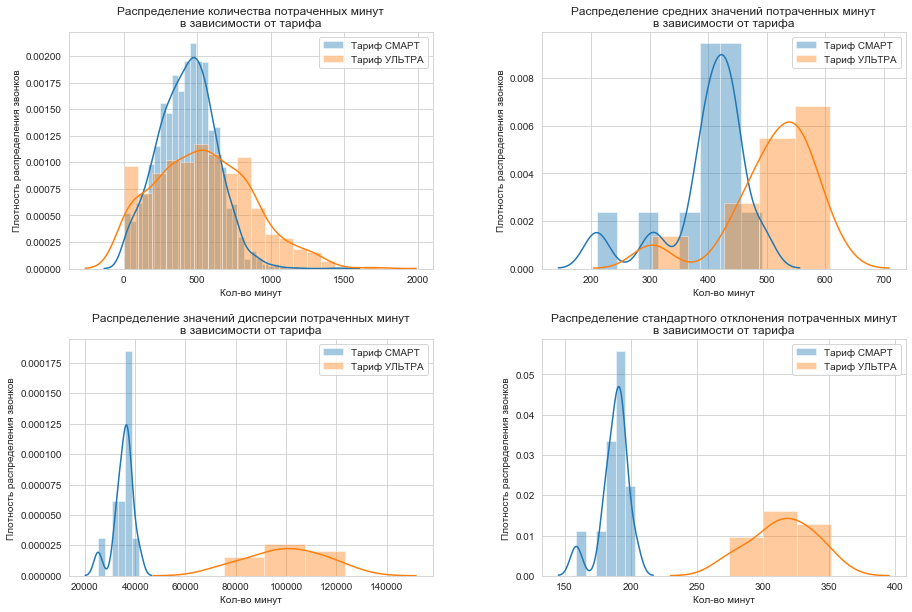

In [89]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.distplot(smart_users_only.duration_sum, label='Тариф СМАРТ')
sns.distplot(ultra_users_only.duration_sum, label='Тариф УЛЬТРА')

plt.title('Распределение количества потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(smart_only.duration_mean, label='Тариф СМАРТ')
sns.distplot(ultra_only.duration_mean, label='Тариф УЛЬТРА')

plt.title('Распределение средних значений потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.distplot(smart_only.duration_var, label='Тариф СМАРТ')
sns.distplot(ultra_only.duration_var, label='Тариф УЛЬТРА')

plt.title('Распределение значений дисперсии потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.distplot(smart_only.duration_std, label='Тариф СМАРТ')
sns.distplot(ultra_only.duration_std, label='Тариф УЛЬТРА')

plt.title(
    'Распределение стандартного отклонения потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right');

**МИНУТЫ РАЗГОВОРА - Пользователи тарифа "УЛЬТРА" vs "СМАРТ" пользователей:**
    - суммарно тратят меньше минут разговоров (но их и меньше количестсвенно)
    - говорят дольше чем часть "СМАРТ" пользователей
    - в среднем говорят больше 
    - разброс значений больше - более 50% от средней величины т.е. есть те кто говорит сильно меньше чем в среднем 
    все пользователи "УЛЬТРА". С клиентами тарифа "СМАРТ" ситуация лучше - разброс составляет меньше половины среднего
    (особенно во второй половине года)

*выброс слева на первом графике у УЛЬТРА тарифа, видимо, те нулевые значения + значения ниже 1 минуты которые мы округлили до 1 минуты*

#### Гистограммы по позиции "количество потраченных мегабайт" <a name="hist_mb">

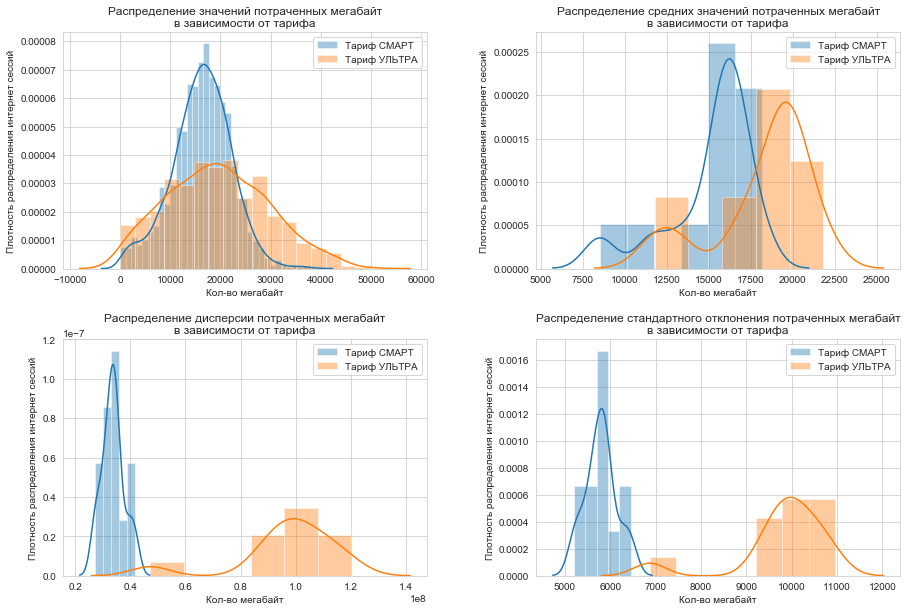

In [90]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.distplot(smart_users_only.mb_used_sum, label='Тариф СМАРТ')
sns.distplot(ultra_users_only.mb_used_sum, label='Тариф УЛЬТРА')

plt.title(
    'Распределение значений потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(smart_only.mb_used_mean, label='Тариф СМАРТ')
sns.distplot(ultra_only.mb_used_mean, label='Тариф УЛЬТРА')

plt.title(
    'Распределение средних значений потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.distplot(smart_only.mb_used_var, label='Тариф СМАРТ')
sns.distplot(ultra_only.mb_used_var, label='Тариф УЛЬТРА')

plt.title(
    'Распределение дисперсии потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.distplot(smart_only.mb_used_std, label='Тариф СМАРТ')
sns.distplot(ultra_only.mb_used_std, label='Тариф УЛЬТРА')

plt.title('Распределение стандартного отклонения потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right');

**МЕГАБАЙТЫ - Пользователи тарифа "УЛЬТРА" vs "СМАРТ" пользователей:**
    - суммарно тратят меньше мегабайт (но их и меньше количестсвенно)
    - тратят больше мегабайт чем часть "СМАРТ" пользователей
    - в среднем используют интернет больше  
    - разброс значений больше - около 50% от средней величины т.е. есть те кто пользуется интернетом сильно меньше чем в среднем все пользователи "УЛЬТРА". С клиентами тарифа "СМАРТ" ситуация лучше - разброс составляет около 1/3 от среднего (особенно во второй половине года)

#### Гистограммы по позиции "количество отправленых сообщений" <a name="hist_msg">

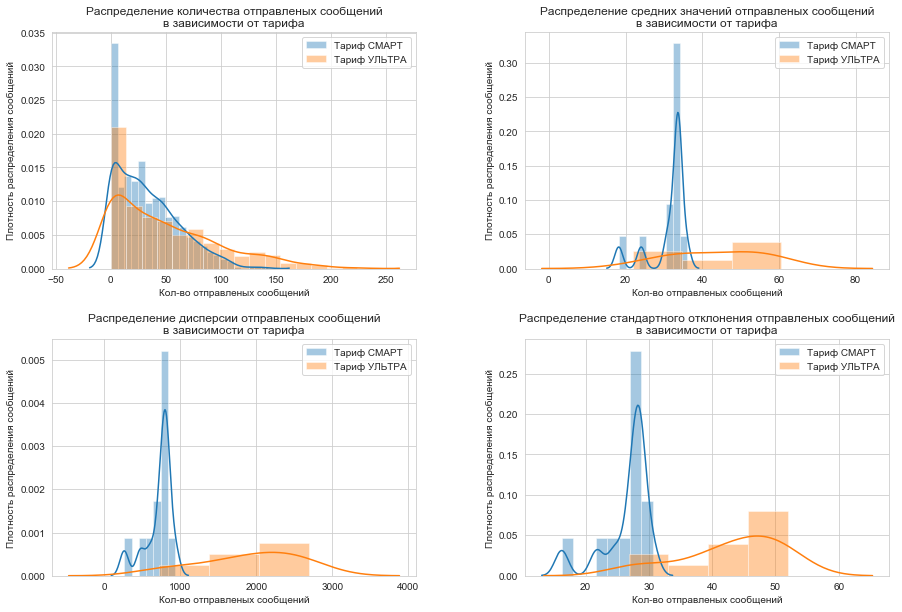

In [91]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.distplot(smart_users_only.message_count, label='Тариф СМАРТ')
sns.distplot(ultra_users_only.message_count, label='Тариф УЛЬТРА')

plt.title(
    'Распределение количества отправленых сообщений\nв зависимости от тарифа')
plt.xlabel('Кол-во отправленых сообщений')
plt.ylabel('Плотность распределения сообщений')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(smart_only.message_mean, label='Тариф СМАРТ')
sns.distplot(ultra_only.message_mean, label='Тариф УЛЬТРА')

plt.title(
    'Распределение средних значений отправленых сообщений\nв зависимости от тарифа')
plt.xlabel('Кол-во отправленых сообщений')
plt.ylabel('Плотность распределения сообщений')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.distplot(smart_only.message_var, label='Тариф СМАРТ')
sns.distplot(ultra_only.message_var, label='Тариф УЛЬТРА')

plt.title(
    'Распределение дисперсии отправленых сообщений\nв зависимости от тарифа')
plt.xlabel('Кол-во отправленых сообщений')
plt.ylabel('Плотность распределения сообщений')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.distplot(smart_only.message_std, label='Тариф СМАРТ')
sns.distplot(ultra_only.message_std, label='Тариф УЛЬТРА')

plt.title('Распределение стандартного отклонения отправленых сообщений\nв зависимости от тарифа')
plt.ylabel('Плотность распределения сообщений')
plt.xlabel('Кол-во отправленых сообщений')
plt.legend(loc='upper right');

**СООБЩЕНИЯ - Пользователи тарифа "УЛЬТРА" vs "СМАРТ" пользователей:**
    - можно говорить о том, что также мало пользуются СМС как и "СМАРТ" пользователей, хотя последние немногим больше за счет массовости.
    - есть те кто отправялет больше СМС чем часть "СМАРТ" пользователей
    - в среднем в первой половине года практически одинаково тратят запас СМС. Во второй половине года у клиентов "УЛЬТРА" наблюдается рост потребности в СМС примерно + 30-50%. 
    - разброс значений в обоих тарифах сравним со средней величиной - фактически кто-то из пользователей может не пользоваться СМС почти совсем.

#### Гистограммы по позиции "выручка" <a name="hist_rev">

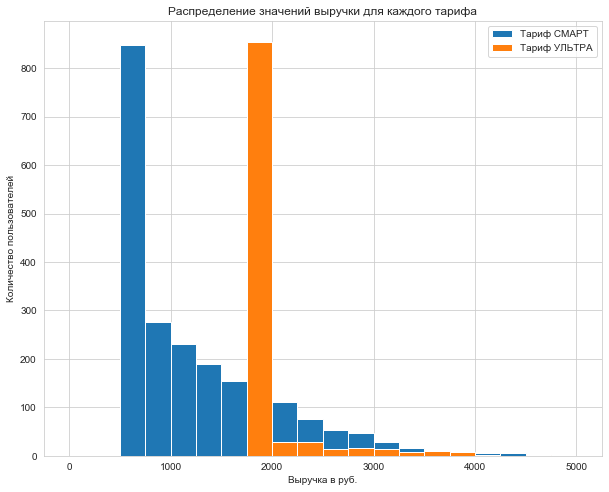

In [92]:
plt.figure(figsize=(10, 8))

smart_users_only.revenue.hist(bins=20, range=(0, 5000), label='Тариф СМАРТ')
ultra_users_only.revenue.hist(bins=20, range=(0, 5000), label='Тариф УЛЬТРА')
plt.title('Распределение значений выручки для каждого тарифа')
plt.legend()
plt.xlabel('Выручка в руб.')
plt.ylabel('Количество пользователей');

**Узнаем сколько в месяц выручка по каждому тарифу**

In [93]:
tariff_sum = users_info_df.pivot_table(index=['tariff', 'month'], values='revenue', aggfunc='sum')
tariff_sum

revenue
tariff month         
smart  1        23962
       2        47100
       3        87236
       4       104671
       5       163661
       6       190948
       7       238257
       8       299940
       9       316543
       10      389128
       11      411992
       12      515299
ultra  1        17550
       2        47354
       3        74155
       4       109748
       5       137684
       6       170693
       7       191874
       8       221612
       9       231577
       10      252998
       11      278823
       12      295546

**Выручка за год (в пределах выборки)**

In [94]:
tariff_sum_year = tariff_sum.groupby('tariff').sum()
tariff_sum_year

,revenue
tariff,
smart,2788737
ultra,2029614


In [95]:
"Выручка по тарифу Смарт больше на {:.1%}".format(1-2029614/2788737)

'Выручка по тарифу Смарт больше на 27.2%'

**Сколько всего пользователей каждого тарифа**

In [96]:
df_users.tariff.value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

- Общая выручка по тарифу "СМАРТ" больше на 27 процентов за год (в пределах предоставленной выборки). 
- Примерно одинаковое количество пользователей двух тарифов обходится месячной абонентской платой. 
- Единицы пользователей "УЛЬТРА" доплачивают за услуги.
- "СМАРТ" пользователя гораздо чаще доплачивают за минуты, мегабайты и сообщения, увеличивая тем самым общую выручку.
- "СМАРТ" пользователя более чем в два раза больше чем пользователей "УЛЬТРА"

###### Итоги анализа поведения пользователей в зависимости от тарифа: <a name="final_by_tariff"></a>
1. Общая картина - пользователи дешевого тарифа "Смарт" суммарно потребляют услуг примерно в 1,5-2 раза больше, чем те кто пользуется тарифом "УЛЬТРА" (если сравнивать помесячно).
- Потребление услуг связи растет от января до декабря. Причем в суммарных величинах разница между первым и четвертым кварталами для тарифа СМАРТ до 8-10 раз, для тарифа "УЛЬТРА" до 4-8 раз.


3. ЗВОНКИ
    - Пользователи тарифа "УЛЬТРА" суммарно тратят меньше минут разговоров, но говорят дольше чем часть "СМАРТ" пользователей
    - Пользователи тарифа "УЛЬТРА" в среднем говорят больше чем "СМАРТ" пользователи
    - Разброс значений для времени разговора в тарифе "УЛЬТРА" больше 50% от средней величины, т.е. есть те клиенты кто говорит сильно меньше чем в среднем пользователи "УЛЬТРА". 
    - Клиенты тарифа "СМАРТ" пользуются связью более менее в одинаковом объеме, ситуация лучше - разброс составляет меньше половины среднего (особенно во второй половине года).
    
    
4. МЕГАБАЙТЫ
    - Пользователи тарифа "УЛЬТРА" суммарно тратят меньше мегабайт (но их и меньше количестсвенно)
    - Некоторые пользователи тарифа "УЛЬТРА" тратят больше мегабайт чем часть "СМАРТ" пользователей
    - Пользователи тарифа "УЛЬТРА", в среднем, в месяц, используют интернет больше чем "СМАРТ" пользователи. 
    - Та же ситуация что и со звонками - разброс значений в "УЛЬТРА" пользователях больше - около 50% от средней величины т.е. есть те кто пользуется интернетом сильно меньше чем в среднем пользователи "УЛЬТРА". 
    - С клиентами тарифа "СМАРТ" ситуация лучше - разброс составляет около 1/3 от среднего (особенно во второй половине года)
  
  
5. СООБЩЕНИЯ
    - Пользователи тарифа "УЛЬТРА" и "СМАРТ" одинаково мало пользуются СМС, хотя последние немногим больше за счет массовости.
    - Некоторые пользователи тарифа "УЛЬТРА" отправлют больше СМС чем часть "СМАРТ" пользователей
    - Пользователи тарифа "УЛЬТРА" и "СМАРТ" в первой половине года практически одинаково тратят запас СМС. Во второй половине года у клиентов "УЛЬТРА" наблюдается рост потребности в СМС примерно + 30-50%. 
    - Разброс значений в обоих тарифах сравним со средней величиной - фактически кто-то из пользователей может не пользоваться СМС почти совсем.


6. ВЫРУЧКА
    - По базе "СМАРТ" пользователя 351 человек, что более чем в два раза больше чем пользователей "УЛЬТРА" - 149 человек
    - Общая выручка по тарифу "СМАРТ" больше на 27 процентов за год (в пределах предоставленной выборки). 
    - Примерно одинаковое количество пользователей двух тарифов обходится месячной абонентской платой. 
    - Единицы пользователей "УЛЬТРА" доплачивают за услуги.
    - "СМАРТ" пользователя гораздо чаще доплачивают за минуты, мегабайты и сообщения, увеличивая тем самым общую выручку.

## Проверка гипотез  <a name="hyp"></a>
По заданию необходимо проверить две гипотезы
 ##### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 ##### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Гипотеза 1: 
### "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"  <a name="hyp_1"></a>
Исходя из формулировки гипотезы принимаем ***нулевую гипотезу H₀*** как:   
***Нет средняя выручка пользователей тарифов "Ультра" и "Смарт" НЕ различаются***

***Уровень значимости*** (пороговое значение) установим как ***1%*** (достаточно, так как очевидно, что гипотеза верна - средние выручки не равны! точно)

Поготовим данные по выручке. Нам нужно два массива - по выручке тарифа "Ульра" и "Смарт"

In [97]:
users_info_df.sample()  # вспомним базу

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
2628,1414,9,314,39,19440,Владимир,smart,1346


In [98]:
revenue_smart = users_info_df.loc[users_info_df['tariff']
                                      == 'smart', 'revenue']
revenue_smart.head()  # проверка

8     1155
9      550
10     550
11     990
12    1525
Name: revenue, dtype: int32

In [99]:
revenue_smart.count()

2229

In [100]:
revenue_ultra = users_info_df.loc[users_info_df['tariff']
                                      == 'ultra', 'revenue']
revenue_ultra.tail()  # проверка

3204    1950
3205    1950
3206    1950
3207    1950
3213    1950
Name: revenue, dtype: int32

In [101]:
revenue_ultra.count()

985

**Проверяем гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"** 

In [102]:
alpha = 0.01  # уровень статистической значимости

results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3962133482813833e-281
Отвергаем нулевую гипотезу


**Гипотеза верна - средние выручки двух тарифов различаются.**

### Гипотеза 2: 
### "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" <a name="hyp_2"></a>
Исходя из формулировки гипотезы принимаем ***нулевую гипотезу H₀*** как:   
***Нет средняя выручка пользователей из Москвы и регионов НЕ различаются***

***Уровень значимости*** (пороговое значение) установим как ***5%*** (как общепринятый параметр)

In [103]:
revenue_moscow = users_info_df.loc[users_info_df['city']
                                       == 'Москва', 'revenue']
revenue_moscow.head()  # проверка

8     1155
9      550
17    1950
18    1950
19    1950
Name: revenue, dtype: int32

In [104]:
revenue_moscow.count() 

611

In [105]:
revenue_other = users_info_df.loc[users_info_df['city']
                                      != 'Москва', 'revenue']
revenue_other.head()  # проверка

0    1950
1    1950
2    1950
3    1950
4    1950
Name: revenue, dtype: int32

In [106]:
revenue_other.count()

2603

In [107]:
alpha = 0.05  # уровень статистической значимости

results = st.ttest_ind(revenue_moscow, revenue_other, equal_var=False)
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5026512166637858
Не получилось отвергнуть нулевую гипотезу


**Нет подтвержения гипотезы 2. Мы не можем уверенно говорить о том что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

## Заключение<a name="final"></a>
#### Данные для проведения исследования
1. Все данные для расчетов хорошо подготовлены, не считая тех. сбоя в данных по звонкам (0 минут разговора). Если это действительно системная ошибка регистрации коротких звонков, то на наши выводы не повлияло решение принять продолжительность таких звонков как 1 минута.
2. В отношении возраста клиентов выборка репрезентативная - распеределение возраста клиента близко к нормальному и охватывает весь диапазон возрастов полной дееспособности.

#### Результаты проведенных расчетов
1. Пользователи дешевого тарифа "СМАРТ" суммарно потребляют услуг примерно в 1,5-2 раза больше, чем те кто пользуется тарифом "УЛЬТРА" (если сравнивать помесячно).
- Не все клиенты полностью используют весь объем услуг предоставляемых им в пределах тарифного плана (особенно это касается пользователей "УЛЬТРА").
- Потребление услуг связи растет от января до декабря. В суммарных величинах разница между первым и четвертым кварталами для тарифа СМАРТ до 8-10 раз, для тарифа "УЛЬТРА" до 4-8 раз.
- Категория "звонки"
    - Пользователи тарифа "УЛЬТРА" суммарно тратят меньше минут разговоров, но говорят дольше чем часть "СМАРТ" пользователей
    - Пользователи тарифа "УЛЬТРА" в среднем говорят больше чем "СМАРТ" пользователи.
    - В тарифе "УЛЬТРА" есть клиенты которые говорят по телефону заметно меньше, чем  "средний" пользователь "УЛЬТРА".
    - Клиенты тарифа "СМАРТ" пользуются связью более менее в одинаковом объеме.
- Категория "интернет"
    - Пользователи тарифа "УЛЬТРА" суммарно тратят меньше мегабайт (но их и меньше количестсвенно)
    - Некоторые пользователи тарифа "УЛЬТРА" тратят больше мегабайт чем часть "СМАРТ" пользователей
    - Пользователи тарифа "УЛЬТРА", в среднем, в месяц, используют интернет больше чем "СМАРТ" пользователи.
    - Та же ситуация что и со звонками - есть те кто пользуется интернетом сильно меньше чем "средний" пользователь "УЛЬТРА".
    - С клиентами тарифа "СМАРТ" ситуация лучше - так же как и со звонками разброс около 1/3 от среднего значения.
- Категория "сообщения" 
    - Пользователи тарифа "УЛЬТРА" и "СМАРТ" одинаково мало пользуются СМС, хотя последние немногим больше за счет массовости.
    - Некоторые пользователи тарифа "УЛЬТРА" отправлют больше СМС чем часть "СМАРТ" пользователей
    - Пользователи тарифа "УЛЬТРА" и "СМАРТ" в первой половине года практически одинаково тратят запас СМС. Во второй половине года у клиентов "УЛЬТРА" наблюдается рост потребности в СМС примерно + 30-50%.
    - Потребности в использовании СМС среди пользователней обоих тарифов очень разные - фактически кто-то из пользователей может не пользоваться СМС почти совсем.
- Анализ выручки (в пределах выборки)
    - По базе "СМАРТ" пользователя 351 человек, что более чем в 2 раза больше чем пользователей "УЛЬТРА" - 149 человек
    - Общая выручка по тарифу "СМАРТ" больше на 27 процентов за год (в пределах предоставленной выборки). 
    - Примерно одинаковое количество пользователей двух тарифов обходится месячной абонентской платой. 
    - У пользователей тарифа "УЛЬТРА" практически нет дополнительных трат по тарифу.
    - "СМАРТ" пользователя гораздо чаще доплачивают за минуты, мегабайты и сообщения, увеличивая тем самым общую выручку.    
    - Основной прирост выручки за пользования дополнительными минутами и мегабайтами.
    
#### Анализ выдвинутых гипотез
1. Гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается". **Полностью подтвердилась** с заданным уровнем статистической значимости = 1%.
- Гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". **Гипотеза не подтвердилась**.

#### Ответы на вопросы коммерческого департамента
1. Оба тарифа имеют свою аудиторию и заполняют определенную нишу на рынке.
- Больше денег приносит тариф "СМАРТ" за счет своей массовости (дешевизны по сравнению с "УЛЬТРА"
- Логично было бы вкладывать больше средств в рекламную кампанию тарифа "СМАРТ", чтобы обеспечить приток дополнительных клиентов.
- Обеспечить приток клиентов на "УЛЬТРА" крайне сложно без снижения стоимости тарифа. Эти клиенты практически ничего дополнительно не покупают. В этом случае прямые убытки будут из-за уменьшения выручки и не очевидного прироста клиентской базы.
- Возможно нужно рассмотреть вариант дробления тарифа "СМАРТ" на два чуть дешевле и чуть дороже. Разница в объеме предоставляемых услуг - тот что дешевле с ощутимо меньшим кол-вом гигабайт и минут в базовой версии, тот что подороже с небольшим увеличением пакета услуг. Как результат дополнительный поток выручки за счет покупки услуг сверх установленного лимита. (не новая идея)